In [ ]:
import os
from pathlib import Path
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torchaudio
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import IPython.display as ipd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/nidhi_data")

In [ ]:
# Read Csv DATA

df = pd.read_csv('/content/drive/MyDrive/nidhi_data/meta/esc50.csv')
df.head(5),df.shape

(            filename  fold  target        category  esc10  src_file take
 0   1-100032-A-0.wav     1       0             dog   True    100032    A
 1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
 2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
 3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
 4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A,
 (2000, 7))

In [ ]:
# Getting list of raw audio files

data_frame = pd.read_csv('/content/drive/MyDrive/nidhi_data/meta/esc50.csv')
root_dir = '/content/drive/MyDrive/nidhi_data'

path=Path('/content/drive/MyDrive/nidhi_data')
wavs = list(path.glob('audio/*'))  # List all audio files in the 'audio' directory using pathlib.Path.glob
len(wavs)

2000

Shape of waveform: torch.Size([1, 220500])
Sample rate of waveform: 44100


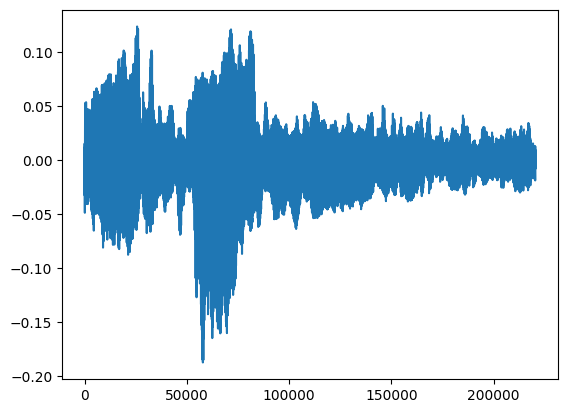

In [ ]:
# Visualizing data
waveform, sample_rate = torchaudio.load(wavs[60])  # Load the waveform and sample rate of the first audio file using torchaudio

print("Shape of waveform: {}".format(waveform.size()))  # Print the shape of the waveform tensor
print("Sample rate of waveform: {}".format(sample_rate))  # Print the sample rate of the audio file

# Plot the waveform using matplotlib
plt.figure()
plt.plot(waveform.t().numpy())  # Transpose and convert the waveform tensor to a NumPy array for plotting

In [ ]:
# Display the audio using IPython.display.Audio
ipd.Audio(waveform, rate=sample_rate)  # Create an interactive audio player for the loaded waveform

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nidhi_data/meta/esc50.csv')
df.head(5),df.shape

(            filename  fold  target        category  esc10  src_file take
 0   1-100032-A-0.wav     1       0             dog   True    100032    A
 1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
 2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
 3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
 4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A,
 (2000, 7))

In [ ]:
import os
import pandas as pd
from pathlib import Path
import torchaudio
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Load your DataFrame here
true_data = pd.read_csv('/content/drive/MyDrive/nidhi_data/meta/esc50.csv')
root_dir = '/content/drive/MyDrive/nidhi_data/audio'


In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader, ConcatDataset
import torchaudio
from pathlib import Path
import torch.nn as nn
import torch.optim as optim

# Define the dataset class
from pathlib import Path
import torch
from torch.utils.data import Dataset
import torchaudio

In [ ]:
# Build class for DATA_SET creation
class my_dataset(Dataset):
    def __init__(self, data_frame, root_dir, resample_rate):
        self.data = data_frame
        self.root_dir = root_dir
        self.resample_rate = resample_rate

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = self.data.iloc[idx, 2]

        waveform, sample_rate = torchaudio.load(file_path)
        waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=self.resample_rate)(waveform)

        return waveform, label

In [ ]:

true_data =true_data[true_data['esc10'] == True]
print(true_data)

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
14     1-110389-A-0.wav     1       0             dog   True    110389    A
24    1-116765-A-41.wav     1      41        chainsaw   True    116765    A
54     1-17150-A-12.wav     1      12  crackling_fire   True     17150    A
55    1-172649-A-40.wav     1      40      helicopter   True    172649    A
...                 ...   ...     ...             ...    ...       ...  ...
1876   5-233160-A-1.wav     5       1         rooster   True    233160    A
1888   5-234879-A-1.wav     5       1         rooster   True    234879    A
1889   5-234879-B-1.wav     5       1         rooster   True    234879    B
1894  5-235671-A-38.wav     5      38      clock_tick   True    235671    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[400 rows x 7 columns]


In [ ]:
true_data.head(5)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
24,1-116765-A-41.wav,1,41,chainsaw,True,116765,A
54,1-17150-A-12.wav,1,12,crackling_fire,True,17150,A
55,1-172649-A-40.wav,1,40,helicopter,True,172649,A


In [ ]:
csv_data =true_data[true_data['esc10'] == True]
print(csv_data)
category_to_target = {category: i for i, category in enumerate(df['category'].unique())}
true_data['target'] = true_data['category'].map(category_to_target)

csv_data.head(5)

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
14     1-110389-A-0.wav     1       0             dog   True    110389    A
24    1-116765-A-41.wav     1      41        chainsaw   True    116765    A
54     1-17150-A-12.wav     1      12  crackling_fire   True     17150    A
55    1-172649-A-40.wav     1      40      helicopter   True    172649    A
...                 ...   ...     ...             ...    ...       ...  ...
1876   5-233160-A-1.wav     5       1         rooster   True    233160    A
1888   5-234879-A-1.wav     5       1         rooster   True    234879    A
1889   5-234879-B-1.wav     5       1         rooster   True    234879    B
1894  5-235671-A-38.wav     5      38      clock_tick   True    235671    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[400 rows x 7 columns]


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
24,1-116765-A-41.wav,1,41,chainsaw,True,116765,A
54,1-17150-A-12.wav,1,12,crackling_fire,True,17150,A
55,1-172649-A-40.wav,1,40,helicopter,True,172649,A


In [ ]:
csv_data = true_data[true_data['esc10'] == True]
print(csv_data)

# Make sure to derive the mapping from true_data
category_to_target = {category: i for i, category in enumerate(csv_data['category'].unique())}
true_data['target'] = true_data['category'].map(category_to_target)


               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
14     1-110389-A-0.wav     1       0             dog   True    110389    A
24    1-116765-A-41.wav     1       9        chainsaw   True    116765    A
54     1-17150-A-12.wav     1      25  crackling_fire   True     17150    A
55    1-172649-A-40.wav     1      26      helicopter   True    172649    A
...                 ...   ...     ...             ...    ...       ...  ...
1876   5-233160-A-1.wav     5      44         rooster   True    233160    A
1888   5-234879-A-1.wav     5      44         rooster   True    234879    A
1889   5-234879-B-1.wav     5      44         rooster   True    234879    B
1894  5-235671-A-38.wav     5      42      clock_tick   True    235671    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[400 rows x 7 columns]


In [ ]:

batch_size = 32



In [ ]:
true_data.head(5)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
24,1-116765-A-41.wav,1,1,chainsaw,True,116765,A
54,1-17150-A-12.wav,1,2,crackling_fire,True,17150,A
55,1-172649-A-40.wav,1,3,helicopter,True,172649,A


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class nidhi_cnn_model(nn.Module):
    def __init__(self, num_classes):
        super(nidhi_cnn_model, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv1d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(8),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(8, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(128, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(512,32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Dropout(0.5)
        )
        self.fc_layer = nn.Linear(160000, 128)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc_layer(x))
        return x

In [ ]:
# Filter true_data acoording to fold value

fold_1=true_data[true_data['fold'] == 1]
fold_2=true_data[true_data['fold'] == 2]
fold_3=true_data[true_data['fold'] == 3]
fold_4=true_data[true_data['fold'] == 4]
fold_5=true_data[true_data['fold'] == 5]


In [ ]:


fold_1_ds=my_dataset(fold_1,root_dir,resample_rate=16000)
fold_2_ds=my_dataset(fold_2,root_dir,resample_rate=16000)
fold_3_ds=my_dataset(fold_3,root_dir,resample_rate=16000)
fold_4_ds=my_dataset(fold_4,root_dir,resample_rate=16000)
fold_5_ds=my_dataset(fold_5,root_dir,resample_rate=16000)

In [ ]:
len(fold_1_ds),len(fold_2_ds),len(fold_3_ds),len(fold_4_ds),len(fold_5_ds)

(80, 80, 80, 80, 80)

In [ ]:
datasets = [fold_1_ds, fold_2_ds, fold_3_ds, fold_4_ds, fold_5_ds]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset
import matplotlib.pyplot as plt



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_workers = 4
# Parameters for training
k = 4
num_epochs = 100
batch_size = 32
learning_rate = 0.001

# Assuming fold_datasets[0] is reserved for testing and fold_datasets[1]-fold_datasets[4] for cross-validation
test_dataset = datasets[0]
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,num_workers=num_workers)

all_train_losses, all_val_losses = [], []
all_train_accuracies, all_val_accuracies = [], []
for fold in range(1, k + 1):
    print(f"Starting fold {fold}/{k} for training and validation")


    train_datasets = [ds for i, ds in enumerate(datasets) if i != fold]
    val_dataset = datasets[fold-1]
    train_dataset = ConcatDataset(train_datasets)


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,num_workers=num_workers)

    # Initialize the model, optimizer, and criterion for each fold to start fresh
    model_cnn = nidhi_cnn_model(num_classes=10).to(device)
    optimizer = optim.Adam(model_cnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []


    for epoch in range(num_epochs):
        # Training
        model_cnn.train()
        train_loss, train_correct, total_train = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model_cnn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = 100 * train_correct / total_train
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)
        # Validation
        model_cnn.eval()
        val_loss, val_correct, total_val = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model_cnn(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_accuracy = 100 * val_correct / total_val
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss / len(val_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%')

    print(f"Training and validation for fold {fold} completed.")
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), all_train_losses[-1], label='Training Loss')
plt.plot(range(1, num_epochs + 1), all_val_losses[-1], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), all_train_accuracies[-1], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), all_val_accuracies[-1], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Starting fold 1/4 for training and validation


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/100, Train Loss: 16.4923, Train Accuracy: 20.31%, Val Loss: 13.7439, Val Accuracy: 0.00%
Epoch 2/100, Train Loss: 10.4890, Train Accuracy: 48.12%, Val Loss: 5.0884, Val Accuracy: 6.25%
Epoch 3/100, Train Loss: 4.8987, Train Accuracy: 56.56%, Val Loss: 8.3905, Val Accuracy: 8.75%
Epoch 4/100, Train Loss: 3.7120, Train Accuracy: 68.44%, Val Loss: 16.8404, Val Accuracy: 6.25%
Epoch 5/100, Train Loss: 2.5784, Train Accuracy: 70.31%, Val Loss: 5.5570, Val Accuracy: 35.00%
Epoch 6/100, Train Loss: 2.7125, Train Accuracy: 70.94%, Val Loss: 3.5021, Val Accuracy: 56.25%
Epoch 7/100, Train Loss: 2.4688, Train Accuracy: 70.00%, Val Loss: 2.8987, Val Accuracy: 65.00%
Epoch 8/100, Train Loss: 2.1875, Train Accuracy: 71.88%, Val Loss: 1.6853, Val Accuracy: 70.00%
Epoch 9/100, Train Loss: 1.9612, Train Accuracy: 75.62%, Val Loss: 1.4666, Val Accuracy: 76.25%
Epoch 10/100, Train Loss: 1.7996, Train Accuracy: 75.94%, Val Loss: 1.2006, Val Accuracy: 78.75%
Epoch 11/100, Train Loss: 1.2157, Train

In [ ]:

model_cnn.eval()
test_loss, test_correct, total_test = 0.0, 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_cnn(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * test_correct / total_test
print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')


In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize lists to store true labels and predicted labels
true_labels_all = []
predictions_all = []

# Iterate over the test dataset and collect true labels and predictions
model_cnn.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_cnn(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels_all.extend(labels.tolist())
        predictions_all.extend(predicted.tolist())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels_all, predictions_all)

print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())
from sklearn.metrics import confusion_matrix, f1_score, classification_report

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'macro' for unbalanced classes
print(f"F1-Score: {f1:.4f}")


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming `true_labels` contains integer labels for multiclass classification
# And `probs` is a NumPy array with shape [n_samples, n_classes] from the model's output

# Binarize the output labels for multiclass
n_classes = probs.shape[1]
y_test_binarized = label_binarize(true_labels, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally, average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multiclass')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Define a Class for Multi Head  self Attention Layers

class MultiHead_cnn(nn.Module):
    def __init__(self, input_size, num_attention_heads):
        super(MultiHead_cnn, self).__init__()

        self.num_attention_heads = num_attention_heads
        self.head_size = input_size // num_attention_heads

        self.query = nn.Linear(input_size, input_size)
        self.key = nn.Linear(input_size, input_size)
        self.value = nn.Linear(input_size, input_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()

        # Linear transformations for queries, keys, and values
        queries = self.query(x).view(batch_size, seq_len, self.num_attention_heads, self.head_size)
        keys = self.key(x).view(batch_size, seq_len, self.num_attention_heads, self.head_size)
        values = self.value(x).view(batch_size, seq_len, self.num_attention_heads, self.head_size)

        # Compute attention scores
        attention_scores = torch.matmul(queries, keys.permute(0, 1, 3, 2)) / (self.head_size ** 0.5)

        # Apply softmax to obtain attention weights
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply attention weights to values
        attended_values = torch.matmul(attention_weights, values)

        # Reshape and concatenate the attended values
        attended_values = attended_values.view(batch_size, seq_len, -1)

        return attended_values


In [ ]:
# Build a Encoder for Transformer

class Encoder_cnn(nn.Module):
    def __init__(self, input_size, num_attention_heads):
        super(Encoder_cnn, self).__init__()

        self.multihead_attention1 = MultiHead_cnn(input_size, num_attention_heads)
        self.multihead_attention2 = MultiHead_cnn(input_size, num_attention_heads)

    def forward(self, x):
        # Multi-head self-attention blocks
        x = self.multihead_attention1(x)
        x = self.multihead_attention2(x)

        return x



In [ ]:
# Define a class for Model that has a transformer on CNN Top

class Top_transformer_my(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_attention_heads):
        super(Top_transformer_my, self).__init__()

        # 1D-Convolutional layer for feature extraction
        self.conv1d = model_cnn.cnn_layers

        # Transformer encoder with multi-head self-attention
        self.transformer = Encoder_cnn(input_size=hidden_size, num_attention_heads=num_attention_heads)

        # MLP head for classification
        self.mlp_head = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        # Apply 1D-convolution
        x = self.conv1d(x)

        # Reshape for transformer
        x = x.permute(0, 2, 1)  # Change shape from (batch, channels, sequence_length) to (batch, sequence_length, channels)

        # Transformer encoder
        x = self.transformer(x)

        # Classification head
        cls_token = x[:, 0, :]  # Assuming <cls> token is at position 0
        output = self.mlp_head(cls_token)

        return output

In [ ]:
# build an Instance for CNN with Transformer on its top

input_size = 1
hidden_size = 32
num_classes = 10
num_attention_heads = 4

nidhi_trans = Top_transformer_my(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes,
                             num_attention_heads=num_attention_heads)

nidhi_trans=nidhi_trans.to(device)

In [ ]:

k = 4  # Number of folds for cross-validation
num_epochs = 100
batch_size = 32
learning_rate = 0.001


# Assuming fold_datasets[0] is reserved for testing and fold_datasets[1]-fold_datasets[4] for cross-validation
test_dataset = datasets[0]
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,num_workers=num_workers)
all_train_losses, all_val_losses = [], []
all_train_accuracies, all_val_accuracies = [], []
for fold in range(1, k + 1):
    print(f"Starting fold {fold}/{k} for training and validation")


    train_datasets = [ds for i, ds in enumerate(datasets) if i != fold]
    val_dataset = datasets[fold-1]
    train_dataset = ConcatDataset(train_datasets)


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,num_workers=num_workers)



    optimizer = optim.Adam(nidhi_trans.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []


    for epoch in range(num_epochs):
        # Training
        nidhi_trans.train()
        train_loss, train_correct, total_train = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = nidhi_trans(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = 100 * train_correct / total_train
        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)


        nidhi_trans.eval()
        val_loss, val_correct, total_val = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs =nidhi_trans(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_accuracy = 100 * val_correct / total_val
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss / len(val_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%')

    print(f"Training and validation for fold {fold} completed.")
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), all_train_losses[-1], label='Training Loss')
plt.plot(range(1, num_epochs + 1), all_val_losses[-1], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), all_train_accuracies[-1], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), all_val_accuracies[-1], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()





In [ ]:
# Ideally, you train this model on all available training data before testing
# For simplicity, we proceed directly to testing, which is not best practice

nidhi_trans.eval()
test_loss, test_correct, total_test = 0.0, 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = nidhi_trans(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * test_correct / total_test
print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')


In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize lists to store true labels and predicted labels
true_labels_all = []
predictions_all = []

# Iterate over the test dataset and collect true labels and predictions
nidhi_trans.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_cnn(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels_all.extend(labels.tolist())
        predictions_all.extend(predicted.tolist())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels_all, predictions_all)

print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
def report_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_trainable_params = total_params - trainable_params
    print(f'Total Parameters: {total_params}')
    print(f'Trainable Parameters: {trainable_params}')
    print(f'Non-trainable Parameters: {non_trainable_params}')

# Example usage
report_parameters(nidhi_trans)

report_parameters(model_cnn)

In [ ]:
true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())
from sklearn.metrics import confusion_matrix, f1_score, classification_report

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'macro' for unbalanced classes
print(f"F1-Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assume model is loaded or trained here

nidhi_trans.eval()  # Set the model to evaluation mode
true_labels = []
predicted_labels = []
probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs =nidhi_trans(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        probs.append(F.softmax(outputs, dim=1).cpu().numpy())  # Store probabilities for ROC calculation

# Calculating metrics
accuracy = accuracy_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
probs = np.concatenate(probs, axis=0)
roc_auc = roc_auc_score(true_labels, probs, multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming `true_labels` contains integer labels for multiclass classification
# And `probs` is a NumPy array with shape [n_samples, n_classes] from the model's output

# Binarize the output labels for multiclass
n_classes = probs.shape[1]
y_test_binarized = label_binarize(true_labels, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally, average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multiclass')
plt.legend(loc="lower right")
plt.show()
